In [20]:
import glob
import os
import json
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import pandas as pd

# Load the contents
with open("train_metrics_20250901_1702.jsonl", "r") as f:
    train_metrics = [json.loads(line) for line in f]

# Load the contents
with open("hellaswag_eval_20250901_1702.jsonl", "r") as f:
    hellaswag = [json.loads(line) for line in f]

df_metrics = pd.DataFrame(train_metrics)
df_metrics = df_metrics.merge(pd.DataFrame(hellaswag), on="step", how="left")
df_metrics

,step,loss,norm,tokens_per_second,lr,shard_index,hellaswag_acc
0,0,11.005327,5.729806,1045.836369,0.000100,0,0.254133
1,5,9.181754,1.868461,148034.843463,0.000100,0,NaN
2,10,8.708914,1.643355,147315.105457,0.000100,0,NaN
3,15,8.327085,1.399452,147956.596059,0.000100,0,NaN
4,20,8.085303,0.920022,147574.835928,0.000100,0,NaN
...,...,...,...,...,...,...,...
9332,46660,2.476252,1.598393,145314.413422,0.000078,15,NaN
9333,46665,2.709462,1.664207,146389.812146,0.000078,15,NaN
9334,46670,2.542343,1.631794,145968.320334,0.000078,15,NaN
9335,46675,2.489223,1.664667,145462.212740,0.000078,15,NaN


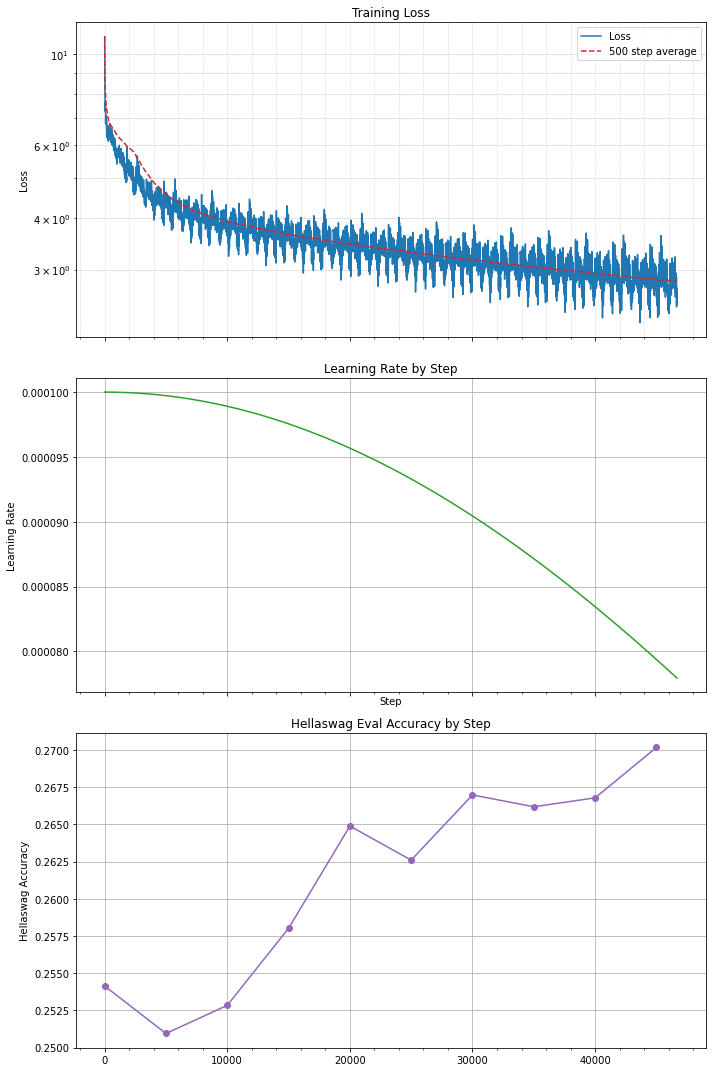

In [21]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 15), sharex=True)

# Add a smoothed loss column using rolling mean
df_metrics['loss_smooth'] = df_metrics['loss'].rolling(window=500, min_periods=1).mean()

# Plot the smoothed loss line
ax1.plot(df_metrics['step'], df_metrics['loss'], color='tab:blue', label='Loss')
ax1.plot(df_metrics['step'], df_metrics['loss_smooth'], color='tab:red', linestyle='--', label='500 step average', zorder=3)
ax1.legend()
ax1.yaxis.grid(True, which='both', linestyle='--', linewidth=0.5)
ax1.xaxis.set_major_locator(mticker.AutoLocator())
ax1.xaxis.set_minor_locator(mticker.AutoMinorLocator())
ax1.xaxis.grid(True, which='both', linestyle=':', linewidth=0.5)
ax1.set_yscale('log')
ax1.set_ylabel('Loss')
ax1.set_title('Training Loss')
ax1.grid(True)

# Plot Learning Rate
ax2.plot(df_metrics['step'], df_metrics['lr'], color='tab:green')
ax2.set_xlabel('Step')
ax2.set_ylabel('Learning Rate')
ax2.set_title('Learning Rate by Step')
ax2.grid(True)

# Plot Hellaswag eval metric
hellaswag_steps = [d['step'] for d in hellaswag]
hellaswag_acc = [d['hellaswag_acc'] for d in hellaswag]
ax3.plot(hellaswag_steps, hellaswag_acc, marker='o', color='tab:purple')
ax3.set_ylabel('Hellaswag Accuracy')
ax3.set_title('Hellaswag Eval Accuracy by Step')
ax3.grid(True)

plt.tight_layout()
plt.show()
